# Homework 4  
Name: Nguyễn Cao Sơn  
Student ID: 21127159  

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import scipy
from sklearn.linear_model import LinearRegression

# Generalization Error

### Problem 1  
1.  Plugin the given values:  

$\epsilon \leq \sqrt{\frac{8}{N} \ln{\left(\frac{4 \cdot (2N)^d}{\delta}\right)}}$  

with $N > 0$, $d = 10$, $\delta = 0.05$ we have:

$\epsilon \leq \sqrt{\frac{8}{N} \ln{\left(\frac{4 \cdot (2N)^{10}}{0.05}\right)}}$  

2.  To find the smallest N that satisfies the inequality, we can use the following code:



In [2]:

def find_N(d, delta):
    N = 1
    while True:
        epsilon = np.sqrt(8/N * np.log(4 * (2*N)**d / delta))
        if epsilon <= 0.05:
            return N
        N += 1

d = 10
delta = 0.05
N = find_N(d, delta)
print(N)

452957


1. So the closest answer is `[d] 460,000`  


### Problem 2  


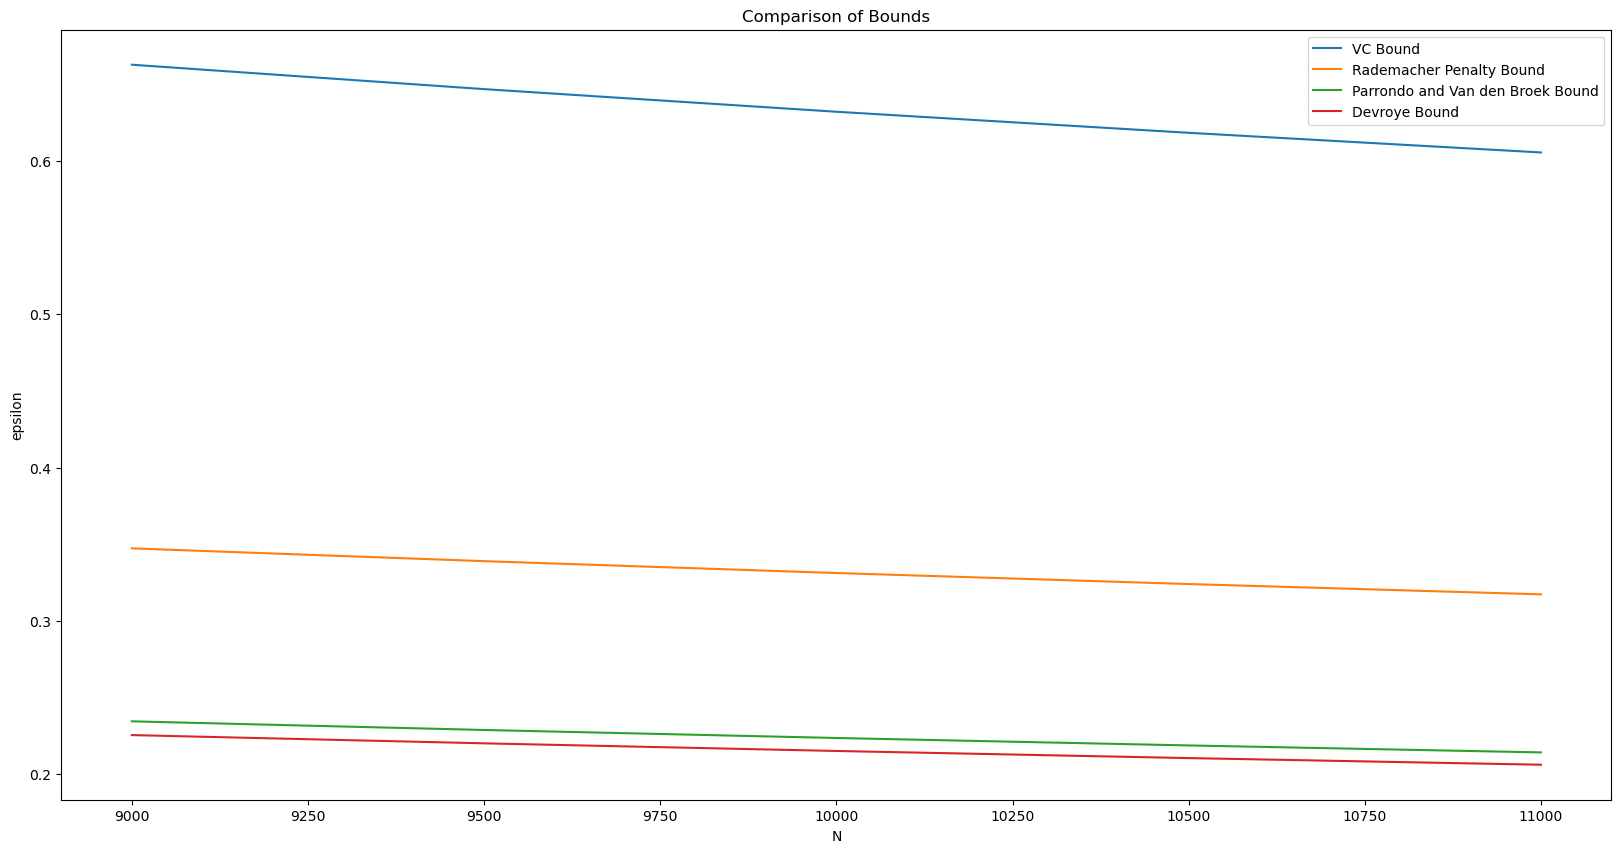

In [3]:
d = 50
delta = 0.05

def vc(N, d, delta):
    return np.sqrt(8/N * np.log(4 * (2*N)**d / delta))

def rademacher(N, d, delta):
    return np.sqrt(2*np.log(2*N*(N**d)) / N) + np.sqrt(2/N * np.log(1/delta)) + 1/N

# im trying to find epsilon with loop but wait too long so i use scipy.optimize after asking chatGPT

def parrondo(N, d, delta):
    f = lambda eps: np.sqrt((2*eps + np.log(6/delta * (2*N)**d))/N) - eps
    return optimize.brentq(f, 0, 1e6) 

def devroye(N, d, delta):
    f = lambda eps: np.sqrt((4*eps*(1+eps) + np.log(4/delta) + 2*d*np.log(N))/(2* N)) - eps
    return optimize.brentq(f, 0, 1e6) 

xstick = range(9000, 11001, 500)
y_vc = [vc(float(N), d, delta) for N in xstick]
y_rad = [rademacher(float(N), d, delta) for N in xstick]
y_par = [parrondo(float(N), d, delta) for N in xstick]
y_dev = [devroye(float(N), d, delta) for N in xstick]

fig = plt.figure(1, figsize=(20, 10))
plt.plot(xstick, y_vc, label="VC Bound")
plt.plot(xstick, y_rad, label="Rademacher Penalty Bound")
plt.plot(xstick, y_par, label="Parrondo and Van den Broek Bound")
plt.plot(xstick, y_dev, label="Devroye Bound")
plt.legend()
plt.xlabel("N")
plt.ylabel("epsilon")
plt.title("Comparison of Bounds")
plt.show()


We can see at N = 10000, the Devroye bound is the smallest.  
So the answer is `[d] Devroye`

### Problem 3  
With N = 5 let's calculate the bounds and plot them:  

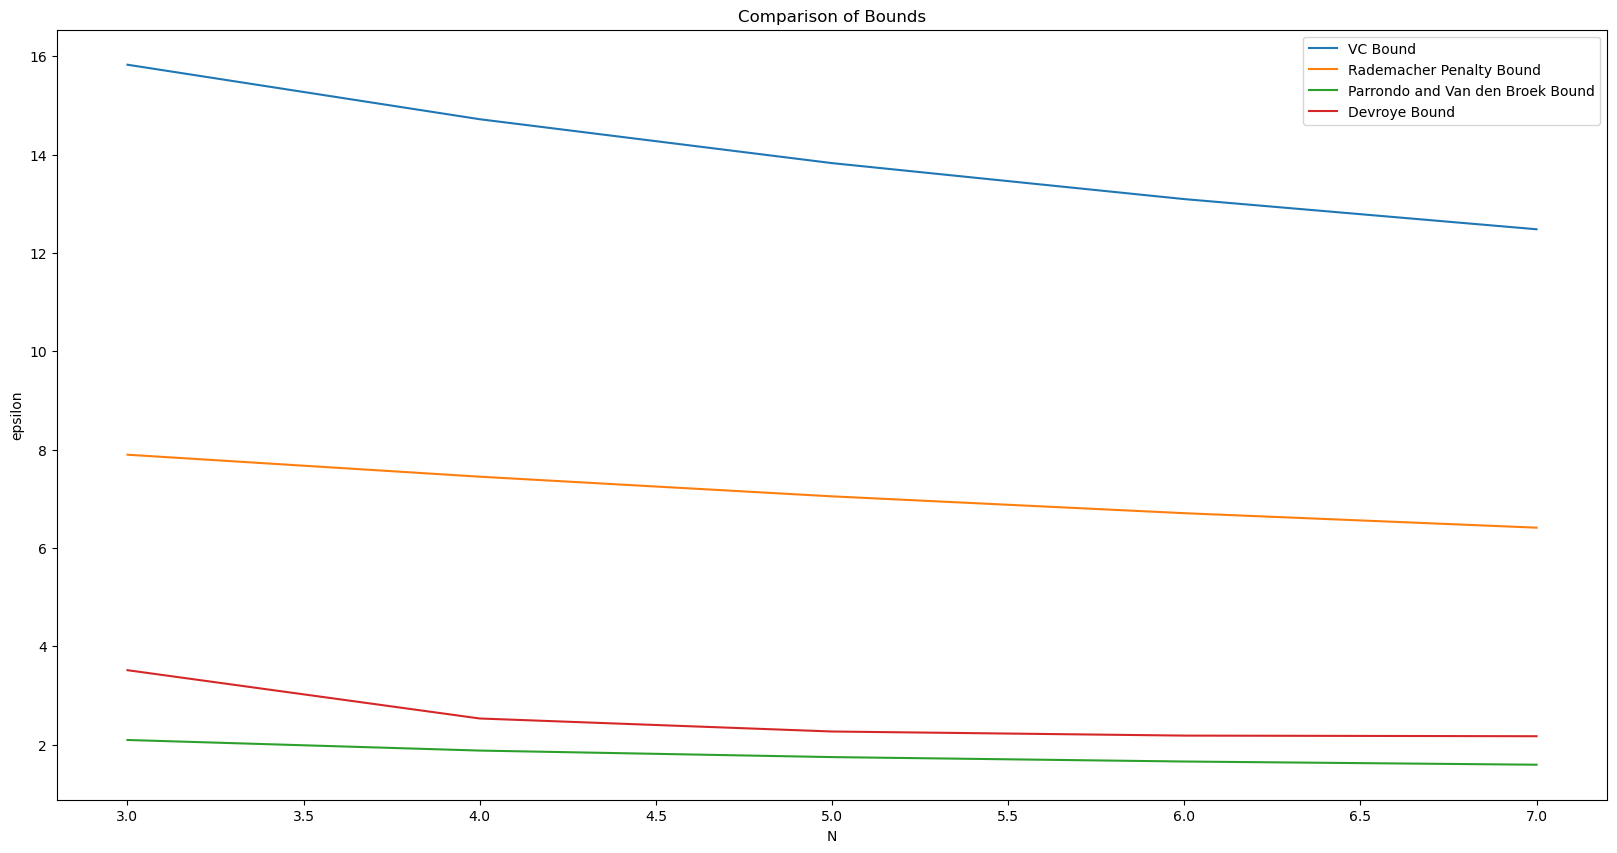

In [4]:

def parrondo(N, d=50, delta=0.05):
    f = lambda eps: np.sqrt((2*eps + np.log(6/delta * 2**(2*N))  )/N) - eps
    return optimize.brentq(f, 0, 5) 

def devroye(N, d=50, delta=0.05):
    f = lambda eps: np.sqrt(   (4*eps*(1+eps) + np.log(4/delta * 2**(N**2))  )   /   (2* N)  ) - eps
    return optimize.brentq(f, 0, 5) 

xstick = range(3, 8, 1)   
y_vc = [vc(float(N), d, delta) for N in xstick]
y_rad = [rademacher(float(N), d, delta) for N in xstick]
y_par = [parrondo(float(N), d, delta) for N in xstick]
y_dev = [devroye(float(N), d, delta) for N in xstick]

fig = plt.figure(1, figsize=(20, 10))
plt.plot(xstick, y_vc, label="VC Bound")
plt.plot(xstick, y_rad, label="Rademacher Penalty Bound")
plt.plot(xstick, y_par, label="Parrondo and Van den Broek Bound")
plt.plot(xstick, y_dev, label="Devroye Bound")
plt.legend()
plt.xlabel("N")
plt.ylabel("epsilon")
plt.title("Comparison of Bounds")
plt.show()

3. So at N = 5, the smallest bound is `[c] Parrondo and Van den Broek`  
---

## Bias and Variance  

### Problem 4  

For the model $h(x) = ax$ i will try to prove $\overline{g}(x) = \hat{a} x$.  

We have $\overline{g}(x)$:

$\overline{g}(x) \approx \sum_{i=1}^{K} g^{D_k}(x)$

In this context, $a^{(D_i)}x$ is called the hypothesis of the model $h(x)$ on the subset $D_i$. This is the hypothesis predicting the output $y$ for each data point $x$ in the subset $D_i$. In that model, $a^{(D_i)}$ is the coefficient corresponding to the subset $D_i$, and $x$ is the data point. Therefore, $a^{(D_i)}x$ represents the predicted output of the model for each data point in the subset $D_i$.
  

$\overline{g}(x) \approx \frac{1}{K} \sum_{i=1}^{K} g^{(D_i)}(x)$ 

$= \frac{1}{K} \sum_{i=1}^{K} a^{(D_i)} x$ 

$= x \frac{1}{K} \sum_{i=1}^{K} a^{(D_i)}$ 

$= x \hat{a}$

$= \hat{a} x$

So $\overline{g}(x)$ = $\hat{a} x$.  

And the answer is `[e] None of the above`

### Problem 5, 6  


In [5]:
# generate data for bias and variance calculation
def generate_pairs(n_pairs=1, n_points=2):
    x_pairs, y_pairs = [], []
    for i in range(n_pairs):
        x = np.random.uniform(-1,1,n_points)
        y = np.sin(np.pi*x)
        x = x.reshape(-1, 1)
        y = y.reshape(-1, 1)
        x_pairs.append(x)
        y_pairs.append(y)
    return x_pairs, y_pairs

N = 1000
w = []
x, y = generate_pairs(N)
for i in range(N):
    lr = LinearRegression(fit_intercept=False)
    lr.fit(x[i], y[i])
    w.append(lr.coef_[0][0])

w_mean = np.mean(w)

x_test, y_test = generate_pairs(1, 100)
y_pred = w_mean * x_test[0]
bias = np.mean((y_pred - y_test)**2)
var = []
for i in range(N):
    pred = w[i] * x_test[0]
    var.append(np.mean((y_pred - pred)**2))
var_mean = np.mean(var)

print('Bias: {}'.format(bias))
print('Variance: {}'.format(var_mean))

Bias: 0.3081552148783505
Variance: 0.2936465467177005


So the answer is closet to: 
- 5. `[b] 0.3`
- 6. `[a] 0.2`  

### Problem 7  
We already know the answers for [a], [b]:  
- [a] is 0.5 + 0.25 = 0.75 ( Lecture 8 at slide 15/22)  
- [b] is 0.26 + 0.21 = 0.47
- [c] is 0.21 + 1.69 = 1.9 ( Lecture 8 at slide 15/22) 


In [6]:
N = 10000
x, y = generate_pairs(N)
x_test, y_test = generate_pairs(1, 100)

se = {'d': [], 'e': []}
d, e = [], []

for i in range(N):
    # g = ax^2
    lr_d = LinearRegression(fit_intercept=False)
    lr_d.fit(x[i]**2, y[i])
    d.append(lr_d.coef_[0][0])
    pred_d = lr_d.predict(x_test[0]**2)
    se['d'].append(np.mean((pred_d - y_test[0])**2))
    
    # g = ax^2 + b
    lr_e = LinearRegression(fit_intercept=True)
    lr_e.fit(x[i]**2, y[i])
    e.append([lr_e.intercept_[0], lr_e.coef_[0][0]])
    pred_e = lr_e.predict(x_test[0]**2)
    se['e'].append(np.mean((pred_e - y_test[0])**2))

d_pred = np.mean(d) * x_test[0]**2
e_pred = np.mean(e,0)[0] + np.mean(e,0)[1] * x_test[0]**2

bias_d = np.mean((d_pred - y_test[0])**2)
bias_e = np.mean((e_pred - y_test[0])**2)

var_d, var_e = [], []
for i in range(N):
    pred_d = d[i] * x_test[0]**2
    var_d.append(np.mean((d_pred - pred_d)**2))

    pred_e = e[i][0] + e[i][1] * x_test[0]**2
    var_e.append(np.mean((e_pred - pred_e)**2))

var_d = np.mean(var_d)
var_e = np.mean(var_e)

print('D:' , bias_d+ var_d)
print('E:' , bias_e+ var_e)


D: 44.76142555276642
E: 118957.97750396418


With the answer above, the smallest is `[b]` Hypotheses of the form $h(x) = a x$  

---
## VC Dimension  
### Problem 8  

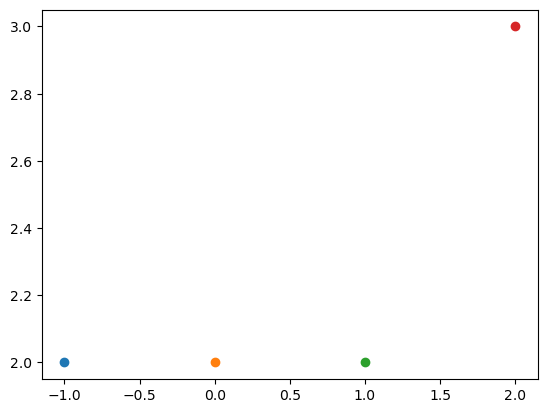

In [7]:
q = 1

def m_H(N):
    if N <= 1:
        return 2
    else:
        return 2 * m_H(N-1) - scipy.special.comb(N-1, q)
    
plt.plot(q-2, m_H(q-2), 'o')    
plt.plot(q-1, m_H(q-1), 'o')
plt.plot(q, m_H(q), 'o')    
plt.plot(q+1, m_H(q+1), 'o')
plt.show()

We can see that $q+1$ seems to be a breakpoint because $m_H(q+1) \leq 2^2$.  
So the answer is `[c] q`  
### Problem 9  
- Min bound: The sets might not intersect, producing an empty hypothesis set, which has a zero VC dimension so we eliminate [d] and [e].
- Max bound: it cant be the sum of the VC dimensions of the individual hypothesis sets because the sets might intersect, so we eliminate [a] and [e]. It also can't be max of the VC dimensions of the individual hypothesis sets because the sets might not intersect, so we eliminate [d] and [c].
- So the answer is `[b]`.  

### Problem 10  
- Because we're taking the union of the hypothesis sets, the lower bound should be the max amongst all sets' VC dimensions. So we eliminate [a], [b] and [c].
- It's is possible for the max bound to be higher than the sum of all VC dimensions. This can occur if there are dependencies or correlations among the hypothesis sets $H_K$ that lead to interactions between their VC dimensions, resulting in a larger maximum bound than the sum of individual VC dimensions. So we eliminate [d] and answer is `[e]`.  
---


## Reference
Problem 4:  
- https://github.dev/homefish/edX_Learning_From_Data_2017/blob/master/homework_4/homework_4_problem_4_5_6_Bias_and_Variance.ipynb

Problem 10:  
- https://stackoverflow.com/questions/4636296/vc-dimension-of-union#:~:text=If%20VC%20%28H_1%29%3Dd_1%20and%20VC%20%28H_2%29%3Dd_2%20and%20d%3Dmax,on%20the%20VC%20of%20the%20union%20is%202d%2B1.